<h1>TTPLA Detectron2 Mask RCNN Trainer</h1>

<p>This notebook demonstrates the end-to-end process for setting up and training a Mask R-CNN model using the Detectron2 framework on the TTPLA dataset. The workflow includes:</p>

<ol>
    <li><strong>Environment Setup:</strong> Installing necessary libraries (such as <code>torch</code>, <code>detectron2</code>, and <code>albumentations</code>), setting up device configurations, and preparing logging utilities.</li>
    <li><strong>Dataset Preparation:</strong> Downloading, extracting, and organizing the TTPLA dataset from Google Drive. The dataset is structured into training and test sets and is prepared for Detectron2 compatibility.</li>
    <li><strong>Data Augmentation:</strong> Applying augmentations to improve model robustness and enhance the variety of training samples.</li>
    <li><strong>Model Configuration and Training:</strong> Setting up Detectron2 configurations for Mask R-CNN, registering datasets, and defining training hyperparameters.</li>
    <li><strong>Evaluation:</strong> Evaluating the trained model on the test set using COCO evaluation metrics.</li>
</ol>

<p>This notebook provides a detailed and modular approach for implementing object detection and segmentation with Detectron2, aimed at improving infrastructure detection capabilities on aerial or street-view images.</p>

<h2>Installation of Libraries</h2>
<p>This cell defines the <code>Installer</code> class, which simplifies the installation of Python libraries using the <code>pip</code> package manager. It includes logging to record each installation event, covering successful installations and error details for troubleshooting.</p>

<h3>Classes</h3>
<ul>
    <li><strong>Installer</strong>: A utility class that automates the installation of Python libraries with logging support.</li>
</ul>

<h3>Usage Example</h3>
<pre><code>installer = Installer()
installer.install(['requests', 'numpy'])  # Install the specified libraries
</code></pre>

In [1]:
import subprocess
import sys
import logging

class Installer():
    """
    A class to manage the installation of Python libraries using pip, with logging support
    for tracking each installation attempt, successful operations, and error details.

    Methods:
        __init__(): Initializes the Installer class, setting up logging configuration.
        _run_pip_command(command): Executes a pip command and logs its execution status.
        _upgrade_pip(): Upgrades pip to the latest version, logging the result.
        install(libraries): Installs a list of libraries and logs the progress and outcomes.
    """
    def __init__(self):
        # Configure logging
        logging.basicConfig(
            level=logging.INFO,
            format='%(asctime)s - %(levelname)s - %(message)s',  # Log format
            handlers=[
                logging.FileHandler('libraries.log'),  # Save logs to a file
                logging.StreamHandler(sys.stdout)  # Also print logs to the console
            ]
        )

    def _run_pip_command(self, command):
        try:
            logging.info(f"Running pip command: {command}")
            subprocess.check_call([sys.executable, "-m", "pip"] + command.split())
            logging.info(f"Command '{command}' executed successfully.")
        except subprocess.CalledProcessError as e:
            logging.error(f"Error while executing command '{command}'. Error: {e}")
            raise

    def _upgrade_pip(self):
        try:
            logging.info('Upgrading pip...')
            self._run_pip_command('install --upgrade pip')
            logging.info("pip upgraded successfully.")
        except Exception as e:
            logging.error(f"Failed to upgrade pip: {e}")
            raise

    def install(self, libraries):
        """
        Installs a list of Python libraries specified by `libraries`.
        
        Args:
            libraries (list): A list of strings, where each string is the name of a library to install.
        
        Raises:
            Exception: If pip upgrade or any library installation fails, an error is logged, and the exception is raised.
        
        Example:
            installer = Installer()
            installer.install(['requests', 'numpy'])
        """
        self._upgrade_pip()
        for library in libraries:
            try:
                logging.info(f"Installing library {library}...")
                self._run_pip_command(f"install {library}")
                logging.info(f"{library} installed successfully.")
            except Exception as e:
                logging.error(f"Failed to install {library}: {e}")
        logging.info('Installation of all libraries completed!')

In [2]:
libs_installer = Installer()
libs_installer.install(
    libraries=[
        'numpy',
        'tqdm',
        'gdown',
        'matplotlib',
        'torch torchvision torchaudio',
        'pycocotools',
        '-U albumentations'
    ]
)
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

2024-10-31 09:15:09,500 - INFO - Upgrading pip...
2024-10-31 09:15:09,501 - INFO - Running pip command: install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
2024-10-31 09:15:12,482 - INFO - Command 'install --upgrade pip' executed successfully.
2024-10-31 09:15:12,483 - INFO - pip upgraded successfully.
2024-10-31 09:15:12,484 - INFO - Installing library numpy...
2024-10-31 09:15:12,484 - INFO - Running pip command: install numpy


2024-10-31 09:15:13,088 - INFO - Command 'install numpy' executed successfully.
2024-10-31 09:15:13,089 - INFO - numpy installed successfully.
2024-10-31 09:15:13,090 - INFO - Installing library tqdm...
2024-10-31 09:15:13,091 - INFO - Running pip command: install tqdm


2024-10-31 09:15:13,704 - INFO - Command 'install tqdm' executed successfully.
2024-10-31 09:15:13,704 - INFO - tqdm installed successfully.
2024-10-31 09:15:13,705 - INFO - Installing library gdown...
2024-10-31 09:15:13,706 - INFO - Running pip command: install gdown


2024-10-31 09:15:14,605 - INFO - Command 'install gdown' executed successfully.
2024-10-31 09:15:14,605 - INFO - gdown installed successfully.
2024-10-31 09:15:14,606 - INFO - Installing library matplotlib...
2024-10-31 09:15:14,607 - INFO - Running pip command: install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 28.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 22.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 55.0 MB/s eta 0:00:00
2024-10-31 09:15:20,214 - INFO - Command 'install matplotlib' executed successfully.
2024-10-31 09:15:20,215 - INFO - matplotlib installed successfully.
2024-10-31 09:15:20,216 - INFO - Installing library torch torchvision torchaudio...
2024-10-31 09:15:20,216 - INFO - Running pip command: install torch torchvision torchaudio


2024-10-31 09:15:20,852 - INFO - Command 'install torch torchvision torchaudio' executed successfully.
2024-10-31 09:15:20,853 - INFO - torch torchvision torchaudio installed successfully.
2024-10-31 09:15:20,854 - INFO - Installing library pycocotools...
2024-10-31 09:15:20,855 - INFO - Running pip command: install pycocotools


2024-10-31 09:15:21,806 - INFO - Command 'install pycocotools' executed successfully.
2024-10-31 09:15:21,807 - INFO - pycocotools installed successfully.
2024-10-31 09:15:21,807 - INFO - Installing library -U albumentations...
2024-10-31 09:15:21,808 - INFO - Running pip command: install -U albumentations


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 36.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 52.7 MB/s eta 0:00:00a 0:00:01


2024-10-31 09:15:32,069 - INFO - Command 'install -U albumentations' executed successfully.
2024-10-31 09:15:32,070 - INFO - -U albumentations installed successfully.
2024-10-31 09:15:32,071 - INFO - Installation of all libraries completed!
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-had88i99
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-had88i99
  Resolved https://github.com/facebookresearch/detectron2.git to commit 8d85329aed8506ea3672e3e208971345973ea761
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 48.0 MB/s e

In [3]:
import os
import numpy as np
import json
import shutil
import gdown
import datetime

import torch
import albumentations as A
from pycocotools.coco import COCO

from tqdm import tqdm
import contextlib
import textwrap

from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import collections
import matplotlib.colors as mcolors

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.engine import DefaultPredictor

from pprint import pprint
class ptype:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

def gprint(content):
    print(
        ptype.BLUE + 
        ptype.BOLD + 
        '{}'.format(content) + 
        ptype.END
    )

2024-10-31 09:16:20,537 - INFO - generated new fontManager


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

NVIDIA GeForce RTX 4090
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


<h1>Preparing Input Directory and the TTPLA Dataset</h1>
<ul>
    <li>We define the path for an input directory, <code>in_data_dir</code>, and create this folder if it doesn’t already exist. This step is essential to organize the necessary input files (trainingset and testset) for the project.</li>
    <li>Inside the input folder, we create another folder named <code>in_dataset_name</code> (<code>ttpla-dataset</code>), where the dataset files will be stored.</li>
    <li>We download the <code>TTPLA</code> dataset from Google Drive using a direct file link (<code>url_dataset</code>) and the <code>gdown</code> module, saving it as a ZIP archive in the dataset directory.</li>
    <li>After downloading, we extract the contents of the ZIP file into the dataset directory and then delete the ZIP file to save disk space.</li>
</ul>

In [5]:
in_data_dir = './input/'
if not os.path.exists(in_data_dir):
    os.makedirs(in_data_dir)
in_dataset_name = 'ttpla-dataset'
in_dataset_path = os.path.join(in_data_dir, in_dataset_name)
if not os.path.exists(in_dataset_path):
    os.makedirs(in_dataset_path)

id_dataset = '1t4ZCts89QfMgsqhJq9Jkmm-VofpgeWCT'
url_dataset = 'https://drive.google.com/uc?id={}'.format(id_dataset)
ftype = 'zip'
dataset_zip_path = os.path.join(in_dataset_path, '{}.{}'.format(in_dataset_name, ftype))
gdown.download(url_dataset, dataset_zip_path, quiet=False, fuzzy=True)
shutil.unpack_archive(dataset_zip_path, in_dataset_path, ftype)  
os.remove(dataset_zip_path)

gprint('TTPLA dataset path')
pprint(in_dataset_path)
print('-'*40)
gprint('TTPLA dataset files list')
pprint(os.listdir(in_dataset_path))

Downloading...
From (original): https://drive.google.com/uc?id=1t4ZCts89QfMgsqhJq9Jkmm-VofpgeWCT
From (redirected): https://drive.google.com/uc?id=1t4ZCts89QfMgsqhJq9Jkmm-VofpgeWCT&confirm=t&uuid=55e51dd5-ffd0-4839-9890-cc1a7891cf76
To: /home/ttpla/input/ttpla-dataset/ttpla-dataset.zip
100%|██████████| 291M/291M [00:21<00:00, 13.7MB/s] 


TTPLA dataset path
'./input/ttpla-dataset'
----------------------------------------
TTPLA dataset files list
['testset', 'trainingset']


<h1>Preparing Working Directory and the TTPLA Dataset Augmented</h1>

In [6]:
out_data_dir = './working/'
out_dataset_name = 'ttpla-dataset-augmented'
out_dataset_path = os.path.join(out_data_dir, out_dataset_name)
if not os.path.exists(out_dataset_path):
    os.makedirs(out_dataset_path)
    
gprint('TTPLA dataset augmented path')
pprint(out_dataset_path)

TTPLA dataset augmented path
'./working/ttpla-dataset-augmented'


In [7]:
"""
This cell provides utility functions for displaying file lists in a readable, side-by-side format
and for truncating long lists of files for concise output.

Functions:
    print_side_by_side_column(name, files): Displays a list of files in a single column format with a header.
    get_file_list(files, num=5): Returns a shortened list of files.

Variables:
    num_toshow (int): The default number of files to show in a truncated list, used by `get_file_list`.
"""

num_toshow = 5

def print_side_by_side_column(name, files):
    max_len = len(files)
    col_width = 30

    gprint(f"{name:<{col_width}}")

    for i in range(max_len):
        file = f"  - {files[i]}" if i < len(files) else " " * col_width
        print(f"{file:<{col_width}}")

def get_file_list(files, num=5):
    if len(files) > num+1:
        return files[:num] + ['...'] + [files[-1]]
    return files

<h2>Training Set Loading</h2>
The next cell provides trainingset loading (images and COCO annotations) that will be used for data augmentation.

In [8]:
trainingset_notaug_name = 'trainingset'
trainingset_notaug_path = os.path.join(in_dataset_path, trainingset_notaug_name)
gprint('Trainingset not augmented path')
print('{}'.format(trainingset_notaug_path))

print('-'*40)

trainingset_notaug_anns_name = 'train.json'
trainingset_notaug_anns_path = os.path.join(trainingset_notaug_path, trainingset_notaug_anns_name)
with open(trainingset_notaug_anns_path, 'r') as file:
    trainingset_notaug_anns_content = json.load(file)
gprint('Trainingset not augmented annotations path')
print('{}'.format(trainingset_notaug_anns_path))

print('-'*40)

trainingset_notaug_files_list = os.listdir(trainingset_notaug_path)
trainingset_notaug_files_display = get_file_list(files=trainingset_notaug_files_list, num=num_toshow)
len(trainingset_notaug_files_list),
print_side_by_side_column(
    name="Trainingset not augmented files",
    files=trainingset_notaug_files_display
)

Trainingset not augmented path
./input/ttpla-dataset/trainingset
----------------------------------------
Trainingset not augmented annotations path
./input/ttpla-dataset/trainingset/train.json
----------------------------------------
Trainingset not augmented files
  - 04_585.jpg                
  - 06_5355.jpg               
  - 07_1035.jpg               
  - 07_1875.jpg               
  - 08_1830.jpg               
  - ...                       
  - 70_00172.jpg              


<h2>COCO Annotations Keys</h2>

In [9]:
anns_content = trainingset_notaug_anns_content
gprint('TTPLA dataset training annotations content keys')
pprint(anns_content.keys())
pprint(anns_content['images'][0].keys())
pprint(anns_content['categories'][0].keys())
pprint(anns_content['annotations'][0].keys())

TTPLA dataset training annotations content keys
dict_keys(['images', 'categories', 'annotations'])
dict_keys(['height', 'width', 'id', 'file_name'])
dict_keys(['supercategory', 'id', 'name'])
dict_keys(['segmentation', 'iscrowd', 'area', 'image_id', 'bbox', 'category_id', 'id'])


In [10]:
class TTPLA_DATASET(torch.utils.data.Dataset):
    """
    A custom PyTorch Dataset class for loading and transforming images and annotations from 
    the TTPLA dataset in COCO format.

    Args:
        imgs_dir (str): Directory where images are stored.
        anns_path (str): Path to the COCO-style annotations file.
        transforms (callable, optional): A function or transform pipeline to apply to the images 
                                         and annotations for data augmentation.

    Attributes:
        imgs_dir (str): Path to the directory containing images.
        anns_path (str): Path to the COCO-format annotations file.
        coco (COCO): An instance of the COCO API initialized with the annotations file.
        img_ids (list): List of image IDs in the dataset.
        transforms (callable): Transformation function to apply to images and annotations.
    """
    def __init__(self, imgs_dir, anns_path, transforms=None):
        """
        Initializes the dataset, loading image paths, annotations, and optional transformations.

        Args:
            imgs_dir (str): Path to the directory where images are stored.
            anns_path (str): Path to the COCO-format annotations JSON file.
            transforms (callable, optional): A transformation function or pipeline for data augmentation.
        """
        self.imgs_dir = imgs_dir
        self.anns_path = anns_path
        self.coco = COCO(self.anns_path)
        self.img_ids = self.coco.getImgIds()
        self.transforms = transforms


    def __getitem__(self, idx):
        """
        Retrieves an image and its annotations by index, applying any specified transformations.

        Args:
            idx (int): The index of the image and annotations to retrieve.

        Returns:
            tuple: A tuple containing:
                - img (PIL.Image): The image.
                - dict: A dictionary of annotations, including:
                    - 'segmentations' (list): A list of binary masks for each object in the image.
                    - 'iscrowds' (list): A list indicating whether each object is "crowded" (1) or not (0).
                    - 'areas' (list): The area for each object in the image.
                    - 'image_id' (int): The index of the image in the dataset.
                    - 'file_name' (str): The file name of the image.
                    - 'bboxes' (list): A list of bounding boxes, each represented as [x, y, width, height].
                    - 'category_ids' (list): A list of category IDs corresponding to each object.
        
        Details:
            - Loads the image and retrieves its annotations using the COCO API.
            - If transformations are specified, applies them to the image and annotations.

        Example:
            img, annotations = dataset[0]
        """
        img_id = self.img_ids[idx]
        img_obj = self.coco.loadImgs(img_id)[0]
        img_name = img_obj['file_name']
        img_path = os.path.join(self.imgs_dir, img_name)
        img = Image.open(img_path)

        img_anns_ids = self.coco.getAnnIds(img_id)
        img_anns_obj = self.coco.loadAnns(img_anns_ids)

        segmentations = [self.coco.annToMask(ann) for ann in img_anns_obj]
        iscrowds = [ann['iscrowd'] for ann in img_anns_obj]
        areas = [ann['area'] for ann in img_anns_obj]
        bboxes = [ann['bbox'] for ann in img_anns_obj]
        category_ids = [ann['category_id'] for ann in img_anns_obj]

        if self.transforms is not None:
            augmented = self.transforms(
                image=np.array(img),
                bboxes=bboxes,
                masks=segmentations,
                category_ids=category_ids
            )
            img = augmented['image']
            bboxes = augmented['bboxes']
            segmentations = augmented['masks']
            category_ids = augmented['category_ids']
            areas = []
            for bbox in bboxes:
                area = int(bbox[-1]*bbox[-2])
                areas.append(area)

        return (
            img,
            {
                'segmentations': segmentations,
                'iscrowds': iscrowds,
                'areas': areas,
                'image_id': idx,
                'file_name': img_name,
                'bboxes': bboxes,
                'category_ids': category_ids
            }
        )


    def __len__(self):
        """
        Returns the total number of images in the dataset.

        Returns:
            int: The number of images in the dataset.
        """
        return len(self.img_ids)

<h2>Data Augmentation Pipeline for TTPLA Dataset</h2>

<p>This section defines a series of image augmentation transformations applied to the TTPLA dataset to 
enhance the robustness of models. The transformations modify image orientation, brightness, color, and 
sharpness, with each applied based on specific probabilities. Bounding box parameters are also adjusted 
to ensure alignment with these transformations.</p>

<h3>Transformations</h3>
<ul>
    <li><strong>VerticalFlip</strong>: Flips the image vertically with a 70% probability.</li>
    <li><strong>HorizontalFlip</strong>: Flips the image horizontally with a 70% probability.</li>
    <li><strong>RandomBrightnessContrast</strong>: Randomly adjusts brightness and contrast with an 80% probability.</li>
    <li><strong>RGBShift</strong>: Randomly shifts the RGB color channels within specified limits (±30) with a 30% probability.</li>
    <li><strong>Blur</strong>: Applies a blurring effect with a maximum kernel size of 11.</li>
</ul>

<h3>Bounding Box Parameters</h3>
<ul>
    <li><strong>format</strong>: Specifies that bounding boxes are provided in COCO format ([x, y, width, height]).</li>
    <li><strong>min_visibility</strong>: Ensures that bounding boxes must have at least 5% visibility to be retained after transformations.</li>
    <li><strong>label_fields</strong>: Keeps fields (like 'category_ids') consistent with transformed bounding boxes.</li>
    <li><strong>clip</strong>: Clips bounding boxes to fit within the image boundaries after transformations.</li>
</ul>

<p>This augmentation pipeline, defined using the <code>albumentations</code> library, can be used in a dataset 
class by passing it as the <code>transforms</code> parameter. This allows the transformations to be applied dynamically 
during data loading, making the data more varied and enhancing the model's ability to generalize.</p>

In [ ]:
transforms = A.Compose(
    [
        A.VerticalFlip(p=0.7),
        A.HorizontalFlip(p=0.7),
        A.RandomBrightnessContrast(p=0.8),
        A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),
        A.Blur(blur_limit=11)
    ],
    bbox_params=A.BboxParams(
        format='coco',
        min_visibility=0.05,
        label_fields=['category_ids'],
        clip=True
    )
)

<h2>Plot Function for Visualization Purposes</h2>

In [12]:
def _overlay_masks(masks):
    """
    Combines multiple binary masks into a single mask by overlaying.
    
    Args:
        masks (ndarray): A 3D NumPy array where each slice along the first dimension is a binary mask.
        
    Returns:
        ndarray: A 2D NumPy array representing the overlay of all input masks.
    """
    return np.max(masks, axis=0)


def plot(idx, img, bboxes, masks, category_ids, categories):
    """
    Plots an image with bounding boxes, category labels, and an overlaid mask for visualization purposes.

    Args:
        idx (int): The index of the image, used to set the title.
        img (ndarray): The image to be displayed, as a PIL image.
        bboxes (list of lists): A list of bounding boxes, where each box is defined as [x, y, width, height].
        masks (ndarray): A 3D NumPy array containing binary masks for each object.
        category_ids (list of int): A list of category IDs corresponding to each bounding box and mask.
        categories (dict): A dictionary mapping category IDs to category names.
    """
    fig, ax = plt.subplots(1,1,figsize=(5,5))
    ax.imshow(img)

    for bbox, category_id in zip(bboxes, category_ids):
        x, y, w, h = bbox
        rect = patches.Rectangle((x, y), w, h, linewidth=0.5, edgecolor='magenta', fc ='none')
        ax.add_patch(rect)
        class_name = categories[category_id]
        ax.text(x, y, str(class_name), verticalalignment='top', color='white', fontsize=10, weight='bold')

    cyan = mcolors.LinearSegmentedColormap.from_list('custom_cyan', [(0, 0, 0), (0, 1, 1)])
    masks = _overlay_masks(masks)
    ax.imshow(masks, cmap=cyan, alpha=0.4)

    ax.axis('off')
    ax.set_title('img_{}'.format(idx))

<h2>Annotations Categories Visualization</h2>

In [13]:
def get_categories(anns_path):
    """
    Getting dictionary where keys are progressive values while values are the names of categories of the COCO json.

    Args:
        anns_path (str): Path to the COCO-format annotations JSON file.
        
    Returns:
        dict: A dictionary where keys are category IDs and values are category names.
    """
    with open(anns_path, 'r') as file:
        anns_content = json.load(file)
    categories = {}
    for cat in anns_content['categories']:
        cat_id = cat['id']
        cat_name = cat['name']
        categories[cat_id] = cat_name
    return categories

categories = get_categories(anns_path=trainingset_notaug_anns_path)
gprint('Annotations categories')
pprint(categories)

Annotations categories
{0: 'cable', 1: 'tower_lattice', 2: 'tower_tucohy', 3: 'tower_wooden'}


In [14]:
def print_info(img, t):
    print('image_name={}'.format(img.filename))
    print('image_size={}'.format(img.size))
    print("len(t['segmentations'])={}".format(len(t['segmentations'])))
    print("len(t['bboxes'])={}".format(len(t['bboxes'])))
    print("t['category_ids'])={}".format(t['category_ids']))

In [15]:
# example image id for visualization purposes
idx = 176

<h2>Loading Training Set Not Augmented</h2>

In [16]:
trainingset_notaug = TTPLA_DATASET(
    imgs_dir=trainingset_notaug_path,
    anns_path=trainingset_notaug_anns_path
)

loading annotations into memory...
Done (t=0.12s)
creating index...
index created!


<h3>Training Set Not Augmented Example</h3>

image_name=/home/ttpla/input/ttpla-dataset/trainingset/09_2550.jpg
image_size=(700, 700)
len(t['segmentations'])=12
len(t['bboxes'])=12
t['category_ids'])=[0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]


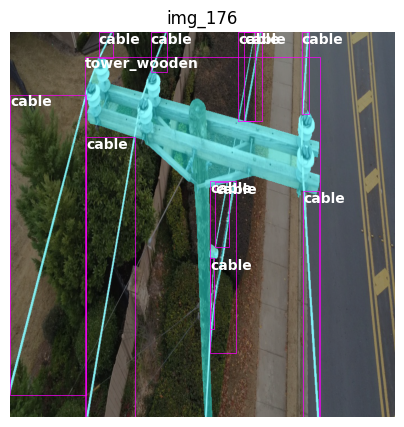

In [17]:
img, t = trainingset_notaug[idx]
print_info(img, t)
plot(
    idx=idx,
    img=img,
    bboxes=t['bboxes'],
    masks=t['segmentations'],
    category_ids=t['category_ids'],
    categories=categories
)

<h2>Generating Augmented Training Sets</h2>

<p>In this cell, we create multiple augmented versions of the training dataset to enhance model performance by increasing data variability. This augmentation process leverages the <code>TTPLA_DATASET</code> class with predefined transformations.</p>

<ul>
    <li><strong>num_augmentations</strong>: Defines the number of augmented training sets to generate. In this case, it is set to 5.</li>
    <li><strong>trainingsets_aug</strong>: An empty list initialized to store each augmented dataset.</li>
</ul>

<p>This process results in a list of augmented training datasets, each with different transformations, to help the model generalize better during training.</p>

In [18]:
num_augmentations = 5

trainingsets_aug = []
for i in tqdm(range(num_augmentations), desc="Loading Augmented Data"):
    with contextlib.redirect_stdout(None):
        tsaug = TTPLA_DATASET(
            imgs_dir=trainingset_notaug_path,
            anns_path=trainingset_notaug_anns_path,
            transforms=transforms
        )
        trainingsets_aug.append(tsaug)

Loading Augmented Data: 100%|██████████| 5/5 [00:00<00:00,  5.95it/s]


<h3>Training Sets Augmented Examples</h3>

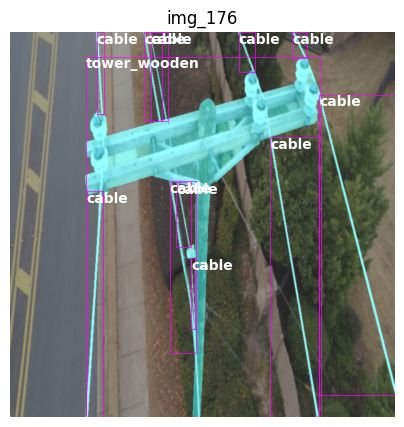

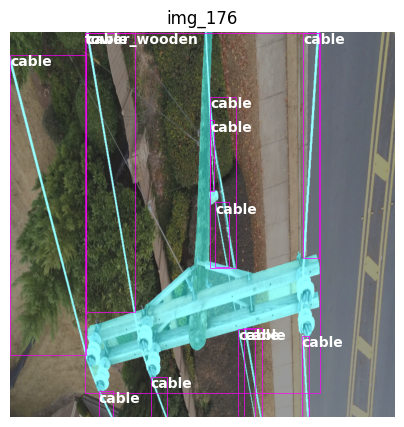

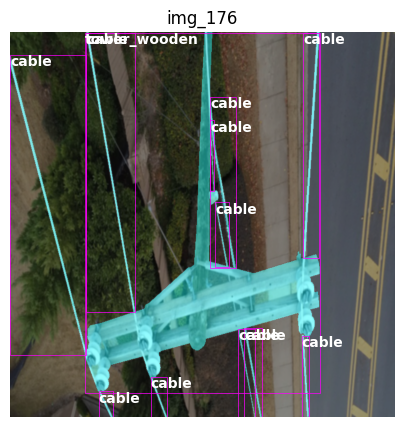

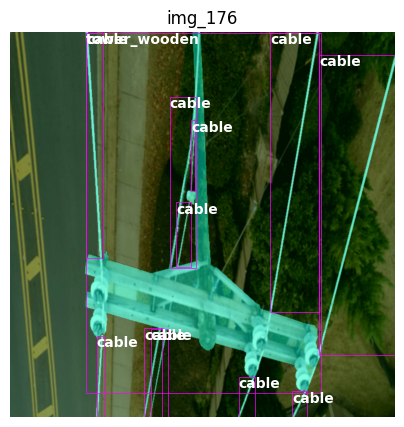

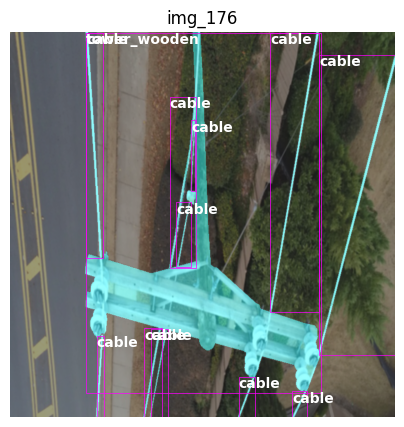

In [19]:
for i in range(num_augmentations):
    img, t = trainingsets_aug[i][idx]
    plot(
        idx=idx,
        img=img,
        bboxes=t['bboxes'],
        masks=t['segmentations'],
        category_ids=t['category_ids'],
        categories=categories
    )

<h2>Combining Augmented and Original Training Sets</h2>

<p><strong>Dataset Combination</strong></p>
<p>We use <code>torch.utils.data.ConcatDataset</code> to concatenate the original and augmented datasets into a single.<p>

<p>The final output shows the length of the combined training set, confirming the total number of samples available for training.</p>

In [20]:
trainingset_aug_name = 'trainingset'
trainingset_aug_path = os.path.join(out_dataset_path, trainingset_aug_name)
if not os.path.exists(trainingset_aug_path):
    os.makedirs(trainingset_aug_path)
gprint('Trainingset augmented path')
print('{}'.format(trainingset_aug_path))

print('-'*40)
gprint('Trainingset not augmented length')
print(f'len(trainingset) = {len(trainingset_notaug)}')
trainingsets = list()
trainingsets.append(trainingset_notaug)
for i in range(num_augmentations):
    trainingsets.append(trainingsets_aug[i])

# joining augmented data all together
trainingset = torch.utils.data.ConcatDataset(
    datasets=trainingsets
)
print('-'*40)
gprint('Trainingset augmented length')
print(f'len(trainingset) = {len(trainingset)}')

Trainingset augmented path
./working/ttpla-dataset-augmented/trainingset
----------------------------------------
Trainingset not augmented length
len(trainingset) = 842
----------------------------------------
Trainingset augmented length
len(trainingset) = 5052


<h2>Dataset Annotation and Export</h2>

<p>This section contains two key functions for processing and exporting annotated dataset images:</p>

<ul>
    <li><strong>check_anns</strong>: Processes and validates masks, bounding boxes, and category information for each annotation, converting them to a format compatible with COCO.</li>
    <li><strong>write_dataset</strong>: Saves each image from the dataset with updated annotations in COCO format, exporting them to a specified directory.</li>
</ul>

<h3>Function Details</h3>
<p><strong>check_anns</strong>: Converts masks to Run-Length Encoding (RLE) format and computes area. Bounding boxes, category IDs, and crowd indicators are converted to appropriate data types for COCO compatibility.</p>

<p><strong>write_dataset</strong>: Loops over the dataset, saves each image with a unique name, and constructs COCO-style annotations. The function includes predefined category mappings ("cable," "tower_lattice", "tower_lattice"). The combined output is returned as a JSON object for export.</p>

<h3>Output</h3>
<p>This cell will generate a COCO-format JSON object containing images, annotations, and category metadata related to trainingset augmented. This JSON can be saved and used for model training.</p>

In [21]:
def check_anns(masks, bboxes, category_ids, iscrowds):
    """
    Validates and reformats annotations for compatibility with COCO.

    Args:
        masks (list of ndarray): List of binary masks for objects in an image.
        bboxes (list of list): List of bounding boxes, each formatted as [x, y, width, height].
        category_ids (list of int): List of category IDs for each object.
        iscrowds (list of int): List indicating whether each object is "crowded".

    Returns:
        tuple: Contains lists of:
            - segmentations (RLE format for each mask),
            - areas (pixel areas for each mask),
            - bboxes (formatted bounding boxes),
            - category_ids (formatted category IDs),
            - iscrowds (formatted crowd indicators).
    """
    newsegmentations, newareas, newbboxes, newcategory_ids, newiscrowds = list(), list(), list(), list(), list()
    for (
        i,
        (mask, bbox, category_id, iscrowd)
    )in enumerate(zip(masks, bboxes, category_ids, iscrowds)):
        from pycocotools import mask as pycocomask
        rle = pycocomask.encode(np.asfortranarray(mask))
        area = pycocomask.area(rle)

        newsegmentations.append(rle)
        newareas.append(float(area))
        box = list()
        for b in bbox:
            box.append(float(b))
        newbboxes.append(box)
        newcategory_ids.append(int(category_id))
        newiscrowds.append(int(iscrowd))

    return (
        newsegmentations,
        newareas,
        newbboxes,
        newcategory_ids,
        newiscrowds
    )


def write_dataset(dataset, dataset_path, img_type):
    """
    Saves images from a dataset and generates a COCO-format JSON structure with image and annotation data.

    Args:
        dataset (Dataset): The dataset to process.
        dataset_path (str): The dataset path.
        img_type (str): File extension (e.g., '.jpg') for saving images.

    Returns:
        dict: COCO-format JSON dictionary with keys 'images', 'categories', and 'annotations'.

    Process:
        - Iterates over dataset items, saving each image and generating unique IDs and file names.
        - Creates image entries in COCO format (height, width, ID, file name).
        - Processes annotations using `check_anns` for compatibility and adds them to the JSON content.

    Example:
        json_content = write_dataset(dataset, "path/to/output", ".jpg")
    """
    image_id = 0
    ann_id = 1
    json_content = {}
    images_content = list()
    categories_content = [
        {
            "supercategory": "cable",
            "id": 0,
            "name": "cable"
        },
        {
            "supercategory": "tower_lattice",
            "id": 1,
            "name": "tower_lattice"
        },
        {
            "supercategory": "tower_tucohy",
            "id": 2,
            "name": "tower_tucohy"
        },
        {
            "supercategory": "tower_wooden",
            "id": 3,
            "name": "tower_wooden"
        }
    ]
    annotations_content = list()
    for i in tqdm(range(len(dataset))):
        img, anns = dataset[i]
        randid = np.random.randint(0, 999999)
        img_file_name = anns['file_name'].replace(img_type, '') + '{}'.format(randid) + img_type
        img_path = os.path.join(dataset_path, img_file_name)
        if isinstance(img, np.ndarray):
            img = Image.fromarray(img)
        img.save(img_path)

        # image annotation
        img_dict = {}
        img_dict['height'] = int(img.size[0])
        img_dict['width'] = int(img.size[1])
        img_dict['id'] = int(image_id)
        img_dict['file_name'] = str(img_file_name)
        images_content.append(img_dict)

        # annotations
        (segmentations,
         areas,
         bboxes,
         category_ids,
         iscrowds
        ) = check_anns(
            anns['segmentations'],
            anns['bboxes'],
            anns['category_ids'],
            anns['iscrowds']
        )
        num_anns = len(segmentations)
        for a in range(num_anns):
            ann_dict = {}
            segm = segmentations[a]
            s_size = segm['size']
            segm_size = list()
            for s in s_size:
                segm_size.append(int(s))
            segm_counts = segm['counts'].decode('utf-8')
            segmentation = {
                'size': segm_size,
                'counts': segm_counts
            }
            iscrowd = iscrowds[a]
            area = areas[a]
            bbox = bboxes[a]
            category_id = category_ids[a]

            ann_dict['segmentation'] = segmentation
            ann_dict['iscrowd'] = iscrowd
            ann_dict['area'] = area
            ann_dict['image_id'] = image_id
            ann_dict['bbox'] = bbox
            ann_dict['category_id'] = category_id
            ann_dict['id'] = ann_id
            annotations_content.append(ann_dict)

            ann_id = ann_id + 1

        image_id = image_id + 1

    json_content["images"] = images_content
    json_content["categories"] = categories_content
    json_content["annotations"] = annotations_content
    return json_content

<h2>Saving Augmented Training Set and Annotations</h2>

<p>This cell saves the augmented training dataset to a specified path and generates a COCO-format JSON file with the associated annotations. The process involves:</p>

<p><strong>Annotation File Creation</strong></p>
Using the <code>write_dataset</code> function, we save the images and create a COCO-format JSON structure with image and annotation data, setting the image file type to <code>.jpg</code>. 
The JSON annotations for the augmented training set are saved in <code>trainingset_aug_path</code> with the file name <code>train.json</code>.

In [22]:
trainingset_aug_anns_content = write_dataset(
    dataset=trainingset,
    dataset_path=trainingset_aug_path,
    img_type='.jpg'
)
gprint('Trainingset augmented path')
print('{}'.format(trainingset_aug_path))

print('-'*40)

trainingset_aug_anns_name = 'train.json'
trainingset_aug_anns_path = os.path.join(trainingset_aug_path, trainingset_aug_anns_name)
with open(trainingset_aug_anns_path, 'w') as file:
    json.dump(trainingset_aug_anns_content, file, indent=4)
gprint('Trainingset augmented annotations path')
print('{}'.format(trainingset_aug_anns_path))

print('-'*40)

trainingset_aug_files_list = os.listdir(trainingset_aug_path)
trainingset_aug_files_display = get_file_list(files=trainingset_aug_files_list, num=num_toshow)
len(trainingset_aug_files_list),
print_side_by_side_column(
    name="Trainingset augmented files",
    files=trainingset_aug_files_display
)

 21%|██        | 1069/5052 [00:33<03:03, 21.75it/s]/opt/conda/lib/python3.11/site-packages/albumentations/core/bbox_utils.py:478: RuntimeWarning: invalid value encountered in divide
  & (clipped_box_areas / denormalized_box_areas >= min_visibility - epsilon)
100%|██████████| 5052/5052 [03:16<00:00, 25.73it/s]


Trainingset augmented path
./working/ttpla-dataset-augmented/trainingset
----------------------------------------
Trainingset augmented annotations path
./working/ttpla-dataset-augmented/trainingset/train.json
----------------------------------------
Trainingset augmented files   
  - 57_01156112950.jpg        
  - 27_00394846715.jpg        
  - 59_00461928406.jpg        
  - 34_2295811825.jpg         
  - 58_00921929699.jpg        
  - ...                       
  - train.json                


<h2>Loading Training Set Augmented</h2>

In [23]:
trainingset = TTPLA_DATASET(
    imgs_dir=trainingset_aug_path,
    anns_path=trainingset_aug_anns_path
)

loading annotations into memory...
Done (t=0.23s)
creating index...
index created!


<h2>Training Set Augmented Example</h2>

image_name=/home/ttpla/working/ttpla-dataset-augmented/trainingset/70_01315753661.jpg
image_size=(700, 700)
len(t['segmentations'])=16
len(t['bboxes'])=16
t['category_ids'])=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3]


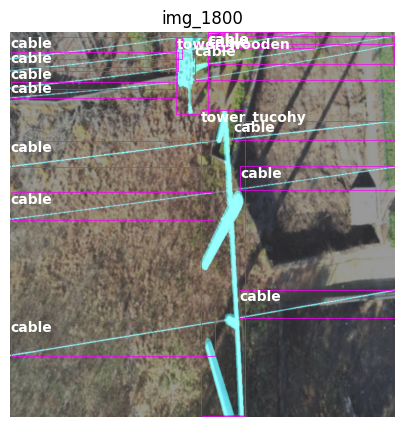

In [24]:
img, t = trainingset[1800]
print_info(img, t)
plot(
    idx=1800,
    img=img,
    bboxes=t['bboxes'],
    masks=t['segmentations'],
    category_ids=t['category_ids'],
    categories=categories
)

<h2>Definition of the paths used in the training configuration</h2>
<ul>
    <li><code>output_dir</code></li>
    <li><code>trainingset_name</code></li>
    <li><code>trainingset_path</code></li>
    <li><code>trainingset_anns_path</code></li>
</ul>

In [25]:
output_dir = "{}/models/ttpla".format(out_data_dir)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

trainingset_name = trainingset_aug_name
trainingset_path = trainingset_aug_path
trainingset_anns_path = trainingset_aug_anns_path

gprint('Trainingset path')
print(trainingset_path)

print('-'*40)

gprint('Trainingset annotations path')
print(trainingset_anns_path)

print('-'*40)

gprint('Models dir path')
print(output_dir)

Trainingset path
./working/ttpla-dataset-augmented/trainingset
----------------------------------------
Trainingset annotations path
./working/ttpla-dataset-augmented/trainingset/train.json
----------------------------------------
Models dir path
./working//models/ttpla


<h1>Training</h1>

<h2>Registering the COCO Dataset for Training</h2>

<p>This cell registers the training dataset in COCO format, making it available for use in object detection frameworks like Detectron2. The registration process includes:</p>

<ul>
    <li><strong>register_coco_instances</strong>: Registers the dataset with the following parameters:
        <ul>
            <li><code>trainingset_name</code>: The name identifier for the dataset.</li>
            <li><code>{}</code>: An empty dictionary for configuration options (can be customized as needed).</li>
            <li><code>trainingset_anns_path</code>: The path to the COCO-format annotations JSON file for the dataset.</li>
            <li><code>trainingset_path</code>: The path to the directory containing the training images.</li>
        </ul>
    </li>
</ul>

<p>Metadata and Dataset Access:</p>
<ul>
    <li><strong>trainingset_metadata</strong>: Retrieves metadata for the registered dataset using <code>MetadataCatalog.get</code>.</li>
    <li><strong>trainingset_dicts</strong>: Retrieves the dataset dictionary using <code>DatasetCatalog.get</code>, which contains individual image and annotation details ready for model training.</li>
</ul>

<p>After executing this cell, the training dataset is fully registered and accessible, making it easy to load and manipulate within the framework.</p>

In [26]:
register_coco_instances(
    trainingset_name, 
    {}, 
    trainingset_anns_path, 
    trainingset_path
)

trainingset_metadata = MetadataCatalog.get(trainingset_name)
trainingset_dicts = DatasetCatalog.get(trainingset_name)

WARNING [10/31 09:20:10 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[10/31 09:20:10 d2.data.datasets.coco]: Loaded 5052 images in COCO format from ./working/ttpla-dataset-augmented/trainingset/train.json


<h2>Using Mask RCNN from Detectron2 for Object Detection and Segmentation</h2>

<p>Detectron2 is a computer vision library developed by Facebook AI Research (FAIR) based on PyTorch, widely recognized as one of the most advanced tools for object detection and segmentation tasks.</p>

<p>In particular, the <strong>Mask R-CNN</strong> model used here is configured with <code>COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml</code>, optimized for the COCO dataset (Common Objects in Context). This model is designed to perform two tasks:</p>

<ul>
    <li><strong>Object Detection</strong>: Identifying the presence and type of objects within an image.</li>
    <li><strong>Instance Segmentation</strong>: Precisely outlining each detected object within the image, providing a pixel-level mask for each instance.</li>
</ul>

<p>The <code>mask_rcnn_X_101_32x8d_FPN_3x.yaml</code> configuration includes:</p>

<ul>
    <li><strong>Mask R-CNN Architecture</strong>: A model structure that combines object detection and segmentation capabilities.</li>
    <li><strong>ResNeXt-101-32x8d Backbone</strong>: A powerful backbone model with a <code>32x8d</code> design, improving feature extraction and representation.</li>
    <li><strong>Feature Pyramid Network (FPN)</strong>: Used to enhance detection accuracy by enabling multi-scale feature representation.</li>
    <li><strong>3x Schedule</strong>: The <code>3x</code> designation indicates that the model was trained for three times the default duration, leading to improved convergence and higher accuracy in detecting and segmenting objects.</li>
</ul>

<p>This setup is well-suited for high-performance tasks in object detection and segmentation, enabling precise and reliable results on complex datasets such as COCO.</p>


<h2>Configuration of Mask R-CNN Model for Instance Segmentation</h2>

<p>In this cell, we configure a Mask R-CNN model for instance segmentation using a Detectron2 framework configuration. This setup includes specifying dataset paths, model parameters, and solver settings to train an instance segmentation model on the registered dataset.</p>

<h3>Configuration Steps</h3>

<ul>
    <li><strong>cfg = get_cfg()</strong>: Initializes the default configuration settings using Detectron2’s <code>get_cfg</code> function.</li>
    <li><strong>config_file</strong>: Specifies the configuration file path for the <code>mask_rcnn_X_101_32x8d_FPN_3x</code> model architecture from the Detectron2 model zoo.</li>
    <li><strong>cfg.merge_from_file</strong>: Merges the selected configuration file’s settings into the current configuration.</li>
</ul>

<h3>Dataset and Dataloader Settings</h3>
<ul>
    <li><strong>cfg.DATASETS.TRAIN</strong>: Sets the training dataset to the registered <code>trainingset_name</code>.</li>
    <li><strong>cfg.DATALOADER.NUM_WORKERS</strong>: Sets the number of worker threads to 8 for parallel data loading.</li>
</ul>

<h3>Input Settings</h3>
<ul>
    <li><strong>cfg.INPUT.MIN_SIZE_TRAIN</strong>: Sets the minimum input image size for training to (700, 700) pixels.</li>
    <li><strong>cfg.INPUT.MAX_SIZE_TRAIN</strong>: Limits the maximum input image size to 700 pixels.</li>
    <li><strong>cfg.INPUT.MASK_FORMAT</strong>: Sets the mask format to "bitmask". Otherwise, the default is "polygon".</li>
</ul>

<h3>Solver Settings</h3>
<ul>
    <li><strong>cfg.SOLVER.IMS_PER_BATCH</strong>: Specifies the batch size per image as 8.</li>
    <li><strong>cfg.SOLVER.BASE_LR</strong>: Sets the initial learning rate to 0.1.</li>
    <li><strong>cfg.SOLVER.MAX_ITER</strong>: Sets the maximum number of training iterations to 10,000.</li>
    <li><strong>cfg.SOLVER.STEPS</strong>: Specifies steps at which the learning rate will decay (1,000 and 5,000 iterations).</li>
</ul>

<h3>Model Settings</h3>
<ul>
    <li><strong>cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE</strong>: Sets the batch size per image for region of interest heads to 256.</li>
    <li><strong>cfg.MODEL.ROI_HEADS.NUM_CLASSES</strong>: Specifies the number of object classes as 4 (matching the dataset).</li>
    <li><strong>cfg.MODEL.SEM_SEG_HEAD.NUM_CLASSES</strong>: Specifies the number of segmentation classes as 4.</li>
    <li><strong>cfg.MODEL.WEIGHTS</strong>: Loads pre-trained weights for the model from the specified <code>config_file</code> checkpoint URL in the model zoo.</li>
</ul>

<h3>Output Directory</h3>
<ul>
    <li><strong>cfg.OUTPUT_DIR</strong>: Specifies the output directory for saving model checkpoints and training logs. If the directory doesn’t exist, it is created.</li>
</ul>

<p>After executing this cell, the model is fully configured and ready for training on the augmented dataset with the specified settings.</p>


In [27]:
cfg = get_cfg()

config_file = "COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"

cfg.merge_from_file(model_zoo.get_config_file(config_file))

cfg.DATASETS.TRAIN = (trainingset_name,)
cfg.DATASETS.TEST = ()

cfg.DATALOADER.NUM_WORKERS = 8

cfg.INPUT.MIN_SIZE_TRAIN = (700,700)
cfg.INPUT.MAX_SIZE_TRAIN = 700
cfg.INPUT.MASK_FORMAT = "bitmask"

cfg.SOLVER.IMS_PER_BATCH = 8

cfg.SOLVER.BASE_LR = 0.1
cfg.SOLVER.MAX_ITER = 10000
cfg.SOLVER.STEPS = [1000, 5000]

cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4
cfg.MODEL.SEM_SEG_HEAD.NUM_CLASSES = 4

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(config_file)

cfg.OUTPUT_DIR = output_dir
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

<h2>Training the Mask R-CNN Model</h2>

<p>This cell initiates the training process for the Mask R-CNN model configured in the previous steps. We use the Detectron2 <code>DefaultTrainer</code> class, which provides a standard training loop with built-in support for logging, checkpointing, and resuming training.</p>

<h3>Training Steps</h3>

<ul>
    <li><strong>trainer = DefaultTrainer(cfg)</strong>: Initializes the trainer with the specified configuration <code>cfg</code>. This configuration includes the model architecture, dataset paths, hyperparameters, and output settings.</li>
    <li><strong>trainer.resume_or_load(resume=False)</strong>: Starts fresh training without resuming from a previous checkpoint. Setting <code>resume=False</code> ensures the model begins training from the specified pre-trained weights.</li>
    <li><strong>trainer.train()</strong>: Begins the training loop, iterating over the dataset as configured. The process includes model updates, logging, and periodic checkpointing based on the settings defined in the configuration.</li>
</ul>

<p>Executing this cell will train the model on the dataset. Once training is complete, the final model and intermediate checkpoints will be saved to the specified output directory.</p>


In [28]:
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[10/31 09:20:12 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_2d9806.pkl: 431MB [00:06, 65.1MB/s]                               

2024-10-31 09:20:19,304 - INFO - Successfully downloaded /root/.torch/iopath_cache/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/139653917/model_final_2d9806.pkl. 431414189 bytes.
2024-10-31 09:20:19,305 - INFO - URL https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/139653917/model_final_2d9806.pkl cached in /root/.torch/iopath_cache/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/139653917/model_final_2d9806.pkl
2024-10-31 09:20:19,306 - INFO - [Checkpointer] Loading from /root/.torch/iopath_cache/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/139653917/model_final_2d9806.pkl ...


2024-10-31 09:20:19,503 - INFO - Reading a file from 'Detectron2 Model Zoo'
2024-10-31 09:20:19,606 - WARNING - Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (5, 1024) in the model! You might want to double check if this is expected.
2024-10-31 09:20:19,607 - WARNING - Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (5,) in the model! You might want to double check if this is expected.
2024-10-31 09:20:19,608 - WARNING - Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (16, 1024) in the model! You might want to double check if this is expected.
2024-10-31 09:20:19,609 - WARNING - Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (16,) in

/opt/conda/lib/python3.11/site-packages/detectron2/data/detection_utils.py:449: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /opt/conda/conda-bld/pytorch_1720538435607/work/torch/csrc/utils/tensor_numpy.cpp:206.)
  torch.stack([torch.from_numpy(np.ascontiguousarray(x)) for x in masks])
/opt/conda/lib/python3.11/site-packages/detectron2/data/detection_utils.py:449: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be 

[10/31 09:20:40 d2.utils.events]:  eta: 2:27:15  iter: 19  total_loss: 3.112  loss_cls: 1.033  loss_box_reg: 0.424  loss_mask: 0.5884  loss_rpn_cls: 0.5819  loss_rpn_loc: 0.3793    time: 0.8848  last_time: 0.9015  data_time: 0.0898  last_data_time: 0.0185   lr: 0.0002881  max_mem: 11300M
[10/31 09:20:58 d2.utils.events]:  eta: 2:28:53  iter: 39  total_loss: 1.684  loss_cls: 0.4511  loss_box_reg: 0.4943  loss_mask: 0.238  loss_rpn_cls: 0.2005  loss_rpn_loc: 0.3119    time: 0.8940  last_time: 0.9198  data_time: 0.0190  last_data_time: 0.0211   lr: 0.0004861  max_mem: 11365M
[10/31 09:21:17 d2.utils.events]:  eta: 2:29:22  iter: 59  total_loss: 1.758  loss_cls: 0.4058  loss_box_reg: 0.5836  loss_mask: 0.1941  loss_rpn_cls: 0.1658  loss_rpn_loc: 0.3506    time: 0.9005  last_time: 0.9217  data_time: 0.0212  last_data_time: 0.0228   lr: 0.0006841  max_mem: 11480M
[10/31 09:21:35 d2.utils.events]:  eta: 2:30:17  iter: 79  total_loss: 1.425  loss_cls: 0.3278  loss_box_reg: 0.5449  loss_mask: 0

<h1>Setting up Model for Evaluation</h1>

<p>This cell configures the trained Mask R-CNN model for evaluation by loading the final model weights and defining the threshold for prediction scores. This setup allows the model to generate predictions on new data.</p>

<h3>Configuration Steps</h3>

<ul>
    <li><strong>cfg.MODEL.WEIGHTS</strong>: Specifies the path to the trained model weights, loading <code>model_final.pth</code> from the output directory where training artifacts are saved.</li>
    <li><strong>cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST</strong>: Sets the score threshold for predictions to <code>0</code>. This value allows all predictions to be considered, regardless of their confidence scores. Adjusting this threshold can help control the number of detections by filtering out low-confidence predictions.</li>
    <li><strong>predictor = DefaultPredictor(cfg)</strong>: Initializes a <code>DefaultPredictor</code> instance using the specified configuration. This predictor will use the trained model weights and threshold settings to generate predictions on input images.</li>
</ul>

<p>After executing this cell, the model is ready to make predictions on new images, leveraging the final weights and configuration set during training.</p>

In [29]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0
predictor = DefaultPredictor(cfg)

[10/31 12:00:56 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./working//models/ttpla/model_final.pth ...
2024-10-31 12:00:56,828 - INFO - [Checkpointer] Loading from ./working//models/ttpla/model_final.pth ...


/opt/conda/lib/python3.11/site-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

<h2>Definition of the paths used in the testing configuration</h2>
<ul>
    <li><code>testset_name</code></li>
    <li><code>testset_path</code></li>
    <li><code>testset_anns_path</code></li>
</ul>

In [30]:
testset_name = 'testset'
testset_path = os.path.join(in_dataset_path, testset_name)
gprint('Testset path')
print('{}'.format(testset_path))

testset_anns_name = 'test.json'
testset_anns_path = os.path.join(testset_path, testset_anns_name)
gprint('Testset annotations path')
print('{}'.format(testset_anns_path))

testset_files_list = os.listdir(testset_path)
testset_display = get_file_list(files=testset_files_list, num=num_toshow)
len(testset_files_list),
print_side_by_side_column(
    name="Testset files",
    files=testset_display
)

register_coco_instances(
    testset_name, {}, 
    testset_anns_path, 
    testset_path
)

Testset path
./input/ttpla-dataset/testset
Testset annotations path
./input/ttpla-dataset/testset/test.json
Testset files                 
  - 04_2220.jpg               
  - 04_3420.jpg               
  - 08_1725.jpg               
  - 1000_00273.jpg            
  - 1000_00285.jpg            
  - ...                       
  - test.json                 


<h2>Evaluating the Model on the Test Dataset</h2>

<p>This cell performs model evaluation on the test dataset using COCO-style metrics. The evaluation includes calculating standard metrics like precision, recall, and mean average precision (mAP) based on the predictions generated by the trained model.</p>

<h3>Evaluation Steps</h3>

<ul>
    <li><strong>evaluator = COCOEvaluator(testset_name, output_dir=output_dir)</strong>: Initializes a <code>COCOEvaluator</code> to compute evaluation metrics on the test dataset. The results are saved in the specified <code>output_dir</code> for easy access and review.</li>
    <li><strong>val_loader = build_detection_test_loader(cfg, testset_name)</strong>: Creates a test data loader for the specified test dataset (<code>testset_name</code>) using the configuration settings (<code>cfg</code>). This data loader facilitates batch processing of test images during evaluation.</li>
    <li><strong>inference_on_dataset(predictor.model, val_loader, evaluator)</strong>: Runs the model inference on the test dataset and applies the <code>evaluator</code> to calculate and print the evaluation metrics.</li>
</ul>

<p>After running this cell, the evaluation metrics are generated and displayed, providing insights into the model's performance on the test dataset. The output includes COCO-style metrics such as AP (Average Precision) and AR (Average Recall) at various thresholds.</p>


In [31]:
evaluator = COCOEvaluator(testset_name, output_dir=output_dir)
val_loader = build_detection_test_loader(cfg, testset_name)
inference_on_dataset(predictor.model, val_loader, evaluator)

WARNING [10/31 12:00:57 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[10/31 12:00:57 d2.data.datasets.coco]: Loaded 400 images in COCO format from ./input/ttpla-dataset/testset/test.json
[10/31 12:00:57 d2.data.build]: Distribution of instances among all 4 categories:
|   category   | #instances   |   category    | #instances   |   category   | #instances   |
|:------------:|:-------------|:-------------:|:-------------|:------------:|:-------------|
|    cable     | 3328         | tower_lattice | 128          | tower_tucohy | 79           |
| tower_wooden | 111          |               |              |              |              |
|    total     | 3646         |               |              |              |              |
[10/31 12:00:57 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/31 12:00:57 d2

OrderedDict([('bbox',
              {'AP': 47.52988537914607,
               'AP50': 68.80201059799556,
               'AP75': 49.45387365829796,
               'APs': 26.75401216116928,
               'APm': 47.48443747062553,
               'APl': 54.506493184525496,
               'AP-cable': 45.57374295002219,
               'AP-tower_lattice': 72.43657282454096,
               'AP-tower_tucohy': 48.00752116904539,
               'AP-tower_wooden': 24.101704572975745}),
             ('segm',
              {'AP': 23.893273266275195,
               'AP50': 44.23349183596494,
               'AP75': 22.433863097278085,
               'APs': 1.8841710844856001,
               'APm': 21.907602334683755,
               'APl': 41.58713738367089,
               'AP-cable': 2.4575310528567935,
               'AP-tower_lattice': 63.90775189091713,
               'AP-tower_tucohy': 16.62862648700955,
               'AP-tower_wooden': 12.579183634317301})])